# Espérance et loi des grands nombres

**Note: Les blocs de code de cette fiche sont *interactifs*: vous pouvez double-cliquer dessus, moidifier leur contenu et/ou exécuter à nouveau le code à l'intérieur en appuyant sur Maj + Entrée.**

Nous avons vu, dans notre cours, ce qu'est une **variable aléatoire**: une fonction qui à chaque issue d'une expérience aléatoire associe un nombre. Nous avons aussi vu comment calculer une valeur en particulier, que l'on appelle **l'espérance**.

Installez-vous, je vous en prie (thé ou café ?) et mettez de la [musique de qualité](https://youtu.be/NkRkuI0ZgX0), car nous allons voir l'utilité de l'espérance et un _très_ grand théorème des probabilités: **la loi des grands nombres**.

## Un problème: la roulette française

Pour cela, nous allons "jouer" à la roulette français (spoil: n'y jouez jamais réellement en casino). Hop, nous allons toute la classe au casino pour une sortie pédagogique, après avoir pris 18 ans chacun, et on se dirige vers la table de jeu.

Un des paris que nous allons pouvoir faire, selon [ce document](https://docs.google.com/document/d/1N-QZC5zoDVxyepuI65WX1MuOofjYPJuceNRREsQyJgg/edit), c'est de parier sur la douzaine: on va parier, par exemple, que le numéro tiré sera entre 1 et 12. On va parier, disons, $10$ euros à chaque fois sur ça. Lorsque l'on gagnera, nous allons obtenir $2 \times 10 = 20$ €.

Alors, à votre avis, si l'on parie un très grand nombre de fois sur la douzaine, combien d'argent allons-nous gagner ou perdre en moyenne ? Pour le savoir, nous allons faire le test, tout simplement ! Mais puisque nous n'avons pas un porte-monnaie extensible et le temps nécessaire, et pour cause de confinement, nous n'allons pas tester tout ceci avec Python !

J'en vois au fond qui sont tombés dans les pommes... Le choc émotionnel, surement... Bon, pendant que j'emmène les autres à l'infirmerie, je vous rassure tout de suite: on va faire ça pas-à-pas, et avec un harnais comme à l'accrobranche, ne vous inquiétez pas ! Ca sera aussi le moment de vous faire découvrir une notion de première spé maths: les **listes**. Pareil, nous allons voir ça en temps et en heure.

## Simulation en Python

Donc, voici notre objectif: nous allons simuler avec Python des tirages successifs à la roulette. Nous allons alors faire la moyenne des gains (ou pertes) et voir combien nous allons gagner si l'on fait ça plusieurs fois.

### Le module `random`

Une première chose qui nous vient à l'esprit tout de suite, c'est: comment va-t-on faire pour simuler un tirage aléatoire à la roulette française ? A chaque lancers de la roulette, un nombre entre $0$ et $36$ va sortir, au hasard. Comment demander à Python de faire ça ?

Pour le faire, nous allons utiliser un module spécialisé dans les **nombres pseudo-aléatoires** (pourquoi "pseudo" ? Parce que la Vie n'est pas parfaite, et que c'est impossible pour un ordinateur de générer des nombres parfaitement aléatoire...). Ce module s'appelle... `random` (c'est vrai, c'est pas ouf), et nous allons l'utiliser dans notre programme, en écrivant cette ligne:

In [1]:
import random

# Cette ligne est totalement facultative, vous pouvez la supprimer.
# C'est juste pour que vous ayez ici les mêmes résultats que moi pendant que j'ai écris le texte...
# En le supprimant, les données vont pas coller à ce que j'aurais écrit, c'est tout !
random.seed(0)

Le module `random` permet pas mal de choses marrantes (voici [sa documentation](https://docs.python.org/fr/3/library/random.html)), mais nous allons ici utiliser une des fonctions, la fonction `randint` qui prend deux nombres `a` et `b`, prend au hasard un nombre en `a` et `b` compris et le renvoie:

In [2]:
print(random.randint(1,3))
print(random.randint(1,3))
print(random.randint(1,3))

2
2
1


Nous pouvons, avec cette fonction, simuler un tirage à la roulette: pour cela, nous allons créer une fonction `expérience` qui, lorsqu'on l'appelle, va tirer un nombre entre $0$ et $36$ (comme à la roulette). Si ce nombre est en $1$ et $12$, on aura gagné au final $10$€. Sinon, on aura perdu $10$€. La fonction va alors nous renvoyer le gain à la fin du tirage.

Voici la bête:

In [3]:
def expérience():
    """Simule un tirage à la roulette et renvoie le gain."""
    nombre = random.randint(0, 36)
    if 1 <= nombre <= 12 :
        return 20
    else:
        return -10

Si on la teste, on voit qu'elle fonctionne parfaitement:

In [4]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

print(expérience())
print(expérience())
print(expérience())

-10
-10
-10


### La notion de liste

Maintenant, nous voudrions utiliser cette fonction pour faire un *grand* nombre de tirage et les stocker. Comment faire ? Nous pourrions créer plusieurs variables, dans lesquels il y aurait les résultats, comme ceci:

In [5]:
var0 = expérience()
var1 = expérience()
var2 = expérience()
var3 = expérience()
#...

print((var0 + var1 + var2 + var3) / 4)

-10.0


Mais vous voyez bien le problème: c'est très répétitif... Et là, on voudrait pas faire juste 4 tirages, mais 1000, voir *100000* !

Nous allons donc ici utiliser les **listes**. Une **liste** est un type de données (comme un entier, une chaine de caractère ou un nombre à virgule), mais qui contient dedans un certain nombre de *"boîtes"*. Chaque *"boîte"* se voit attribuer un numéro, son **index** (la 1ere a le numéro 0, la 2eme le numéro 1, etc.). Ainsi, pour accéder à la boîte, il faudra donner son numéro, et on pourra alors avoir accès à son contenu, ou alors changer son contenu. L'intérêt est alors qu'on n'a besoin de ne créer *qu'une* liste, puis la modifier, au lieu d'avoir *plein* de variables et de devoir toutes les gérer indépendamment.

Voici un exemple de liste, pour illustrer:

In [6]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

# Création de la liste
ma_liste = [1, 5, "un texte", -0.54, "un autre"]

# Affichage de toute la liste
print(ma_liste)

# Affiche le premier nombre
print(ma_liste[0])

# Affiche le deuxième
print(ma_liste[1])

# Modifie la troisème valeur
ma_liste[2] = "J'en prendrais"

# Affiche la liste ainsi modifiée
print(ma_liste)

[1, 5, 'un texte', -0.54, 'un autre']
1
5
[1, 5, "J'en prendrais", -0.54, 'un autre']


Faites bien attention à ceci: une liste de longueur $n$ contient des boîtes numérotées de $0$ à $n-1$. *C'est une erreur fréquente* lorsqu'on découvre les listes, mais vous inquiétez pas, on s'y fait.

Les listes vont nous être très utiles ici: il nous suffit de créer une liste, de la taille qu'on veut, puis de la remplir avec pleins de résultats de nos tirages. Voici la fonction `liste_expérience` qui crée une liste de `taille` éléments et la remplit comme dit:

In [7]:
def liste_expérience(taille):
    """Crée une liste contenant `taille` résultats à la roulette française."""
    résultat = [0] * taille # Crée une liste de `taille` éléments, rempli avec des 0
    for i in range(taille): # Pour i allant de 0 à taille-1
        résultat[i] = expérience() # Remplit la i-éme boîte avec le résultat d'un tirage
    return résultat # Renvoie la liste entière

Et là, vous voyez un des intérêts de `for i in range(n)`: en effet, dans ces boucles, la valeur `i` va changer à chaque répétition et aller de `0` à `n-1`. Pratique pour remplir une liste !

Et là, nous avons une certaine *satisfaction* quand on teste notre fonction:

In [8]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

print(liste_expérience(15))
print(liste_expérience(20))

[-10, -10, 20, -10, 20, 20, -10, -10, 20, -10, 20, 20, -10, -10, -10]
[20, -10, -10, -10, -10, -10, -10, -10, -10, -10, 20, -10, -10, 20, -10, -10, -10, -10, -10, -10]


### La joie des listes

Et maintenant, dernière chose à faire dans notre simulation: à partir de la liste de nos tirages, nous devons faire la **moyenne** des résultats, pour savoir ce que l'on gagne en moyenne. Nous devons donc faire la moyenne d'une liste.

Pour faire la moyenne d'un ensemble de valeur, on doit diviser la **somme** de chaque valeur par **le nombre de valeurs** que l'on a. Alors, déjà, comment connaitre le nombre de valeurs que l'on a dans notre liste ? C'est très simple: la fonction qui nous permet de faire ça, très pratique, est `len` ! Voici un exemple:

In [9]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

ma_liste = [1, 3, 5, 1, 7]
print(len(ma_liste)) # Affiche la taille de la liste

5


Maintenant, deuxième question: comment nous allons calculer la **somme** des nombres de la liste ? La question est au final assez simple: créons une variable `somme` et ajoutons dedans chaque valeur de la liste. Un peu comme ça:

```
somme = 0
Pour chaque valeur dans la liste:
     Ajouter la valeur à `somme`
```

Traduisons maintenant ça en Python. La première ligne est évidente, la troisième est `somme = somme + valeur`, mais comment faire pour la deuxième ? Vous allez être encore une fois très satisfait, car il suffit d'écrire `for valeur in liste` !

En effet, la boucle `for` ne sert pas qu'à faire `for i in range(n)`, mais aussi à faire `for element in ensemble` ! Dans ce cas, la variable `element` va changer à chaque itération, et avoir successivement toutes les valeurs contenus dans `ensemble` ! On l'utilisais alors avec `range`, qui est en réalité un objet imaginé spécialement et qui contient les valeurs sur un certain intervalle, comme entre $0$ et $n-1$ par exemple.

Voici un exemple pour mieux comprendre:

In [10]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

ma_liste = [1, 5, "un texte", -0.54, "un autre"]
for élément in ma_liste:
    print(élément)

1
5
un texte
-0.54
un autre


Quelle bonne surprise, non ?

Cette notation va nous être *très utile* ici, car on peut écrire un programme pour avoir la somme des valeurs d'une liste:

In [11]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

ma_liste = [1, 3, 5, 1, 7]
somme = 0
for élément in ma_liste:
    somme = somme + élément
print(somme)

17


Nous pouvons donc écrire une fonction `moyenne` qui prend une liste `liste` et calcule la moyenne de ses éléments.

Mais avant de la regarder, je vous conseille d'essayer de l'écrire vous-même. Oui, oui ! C'est un entraînement classique et intéressant pour bien comprendre la notion de liste, et voir l'intérêt qu'elles ont. Il faut certes réfléchir un peu, mais quand vous trouvez (reprenez tout ce qu'on a vu pour ça), vous serez satisfaits, et vous verrez que c'est bien plus pratique que si l'on devait créer une variable par nombre et en faire la moyenne directement.

Bon, voici une correction à cette exercice improvisé:

In [12]:
def moyenne(liste):
    """Calcule la moyenne de la liste."""
    nb_éléments = len(liste)
    somme = 0
    for élément in liste:
        somme = somme + élément
    return somme / nb_éléments

Et voilà, nous avons tout ce qu'il nous faut: nous pouvons simuler autant de tirage à la roulette que l'on veut, mettre tous les résultats dans une liste et calculer le gain moyen !

Mais avant de voir les résultats, j'ai juste envie de terminer cette découverte des listes: il existe *une autre manière*, encore plus simple, de créer la fonction `moyenne`. Eh oui, je ne vous l'avais pas dit tout de suite pour que l'on fasse le détour par la boucle `for`, mais il existe en faite une fonction déjà toute faite pour calculer la somme des valeurs d'une liste: la fonction `sum(liste)`... Maintenant que vous savez ça, vous pouvez raccourcir l'écriture de la fonction sur deux lignes:

In [13]:
# Paf ! Deux lignes !
def moyenne(liste):
    """Calcule la moyenne de la liste"""
    return sum(liste) / len(liste)

## Le résultat !

Aaah, nos victimes de Python sont revenues ! Vous avez pas eu trop mal, pendant cette partie ? De toutes façons, c'est bientôt terminé, ne vous en faites pas !

(Bon, plus sérieusement, la situation est encore assez critique pour l'intégration de Python dans les cours, trois ans après la réforme, et c'est très dommage, on peut vraiment avoir un support pédagogique (comme ici pour la loi des grands nombres) très intuitif et pratique... Enfin bon... Sachez que vous n'êtes pas seul si vous ne comprenez pas très bien la programmation Python.)

Donc, vous l'attendiez tous, nous allons voir quel est le gain moyen en pariant sur la douzaine ! Je vais ici faire des tests avec de plus en plus d'essais:

In [14]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

échantillon_1 = liste_expérience(10)
moyenne_1 = moyenne(échantillon_1)
print("Test (10 essais):", moyenne_1)

échantillon_2 = liste_expérience(1000)
moyenne_2 = moyenne(échantillon_2)
print("Test (1000 essais):", moyenne_2)

échantillon_3 = liste_expérience(100000)
moyenne_3 = moyenne(échantillon_3)
print("Test (100000 essais):", moyenne_3)

Test (10 essais): 5.0
Test (1000 essais): 0.11
Test (100000 essais): -0.2176


Nous voyons alors que notre gain moyen est en fait... une perte moyenne: nous avons perdu $-0,2173$ € à chaque tirage en moyenne ! Pour 100000 tirages, je vous laisse calculer, ça fait... $-21730$ € au total ! Heureusement que l'on est pas allé au casino pour faire ça !

Mais regardez comment évolue la moyenne au fur et à mesure que l'on augmente le nombre d'essais: il est au début assez différent de $-0,2173$€, puis s'en rapproche de plus en plus...

Tiens, et pour mieux voir encore ça, je vais le calculer pour des tailles d'échantillon entre $1$ et $100000$ et tout représenter par un graphique grâce à Matplotlib, un module très utile pour représenter des données (vous pouvez vous amuser à lire le code, il reprend très bien les bases des listes):

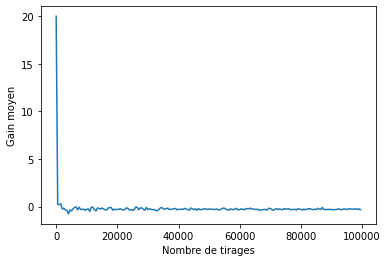

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Cela peut prendre longtemps à s'éxecuter, car il faut simuler 10 millions de tirages environ pour faire ce graphique !

# `list` permet ici de convertir l'objet `range` en liste de nombres
nombres_tirages_testés = list(range(1,100001,500))

liste_moyennes = []
for nb_tirages in nombres_tirages_testés:
    tirages = liste_expérience(nb_tirages)
    liste_moyennes.append(moyenne(tirages))

plt.plot(nombres_tirages_testés, liste_moyennes)
plt.xlabel("Nombre de tirages")
plt.ylabel("Gain moyen")
plt.show()

Comme vous le voyez ici, au début, on est assez éloigné de $-0,22$, mais assez rapidement (dès $500$ tirages), les moyennes vont aller tourner autour de cette valeur, mais en restant assez dispersées. Mais en augmentant encore le nombre de tirage, on voit que ces valeurs sont de moins en moins dispersées et semblent de plus en plus tendre à être relativement la même.

Mais comment nous aurions pu prévoir, sans aucune simulation, que cela se rapprocherait d'une valeur, et laquelle ?

C'est là qu'il faut invoquer un des Pokémons légendaires des probabilités: j'ai nommé... la loi des grands nombres !

## La loi des grands nombres

Cette loi est très importante en statistique: en effet, elle nous montre un moyen de savoir vers quel résultat moyen on va tendre en réaliser un grand nombre de fois (d'où son nom) une expérience aléatoire.

En effet, cette loi nous dit ceci:

> Lorsque le nombre $n$ d'observations à l'issue d'une expérience aléatoire tend vers l'infini, la moyenne de ces observations s'approche de l'espérance de l'expérience.

C'est très intéressant, car cela nous permet, comme expliqué dans [cette vidéo](https://www.youtube.com/watch?v=HRnYFpdR8WM), de voir, dans un aléatoire par définition imprévisible, une forme de régularité et de certitude sur le long terme. Pour peu que le nombre de fois qu'on fait le test est suffisament grand, on peut imaginer que l'on aura en moyenne la même valeur.

Par exemple, la pression d'un gaz, le courant électrique dans un fil, les températures... changent en réalité chaque centième de millisecondes, voir encore plus, mais lorsque l'on fait une mesure sur une seconde entière, on aura une valeur moyenne qui change au final jamais en une seconde. Sinon, imaginez votre thermomètre faire des allers-retours incessants et très rapides ! Grâce à la loi des grands nombres, on voit que ces "grésillements" sont cependant assez peu probable, à notre échelle.

Mais revenons à notre roulette: selon cette loi, notre gain moyen à la roulette tend bien vers un nombre précis (ça parait bête, mais on aurait pu juste avoir ces résultats par pur hasard), et ce nombre est l'espérance de la variable aléatoire du gain à la roulette.

Ainsi, il nous suffit de calculer l'espérance pour voir vers quoi tend ce gain moyen ! On dresse un petit tableau de la variable, et on fait le calcul:

| $G$ | $-10$ | $20$ |
| --- | --- | --- |
|$P(G=...) =$ | $\frac{12}{37}$ | $\frac{25}{37}$ |

Calcul de l'espérance:

$$
E(G) = P(G = 20) \times 20 + P(G = -10) \times (-10) \\
E(G) = \frac{12}{37} \times 20 + \frac{25}{37} \times (-10) \\
E(G) = \frac{-10}{37} \\
E(G) \approx -0,270
$$

Ainsi, selon la loi des grands nombres, le gain moyen va tendre, en jouent un grand nombre de fois, vers $-0,270$ € environ. Donc, on a la triste nouvelle que l'on perdra notre argent à beaucoup y jouer...

Remarquez bien qu'avec 100000 tirages, nous avons obtenu un résultat assez proche de cette espérance ! La loi des grands nombres est bien confirmé ici: plus l'on fait de tirage à la roulette, plus la moyenne est proche de l'espérance.